<a href="https://colab.research.google.com/github/pietro-crc/Python_projects/blob/main/Dr_Semmelweis_Handwashing_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).


.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).



### Upgrade plotly

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration


* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [ ]:
df_yearly.shape


(12, 4)

In [ ]:
df_monthly.shape

(98, 3)

In [ ]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [ ]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [ ]:
df_yearly.year

0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

In [ ]:
df_monthly.date

0    1841-01-01
1    1841-02-01
2    1841-03-01
3    1841-04-01
4    1841-05-01
        ...    
93   1848-11-01
94   1848-12-01
95   1849-01-01
96   1849-02-01
97   1849-03-01
Name: date, Length: 98, dtype: datetime64[ns]

### Check for Nan Values and Duplicates

In [ ]:
df_yearly.isna().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

In [ ]:
df_monthly.isna().sum()

date      0
births    0
deaths    0
dtype: int64

### Descriptive Statistics

In [ ]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [ ]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [ ]:
result = df_yearly.deaths.mean() / df_yearly.births.mean()
percent = result.round(2)*100
print(f'{percent.round()}%')

7.0%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

*Created a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:


* Formatted the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.


In [ ]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [ ]:
plot_data = df_yearly.groupby('year')[['births','deaths']].sum().reset_index()

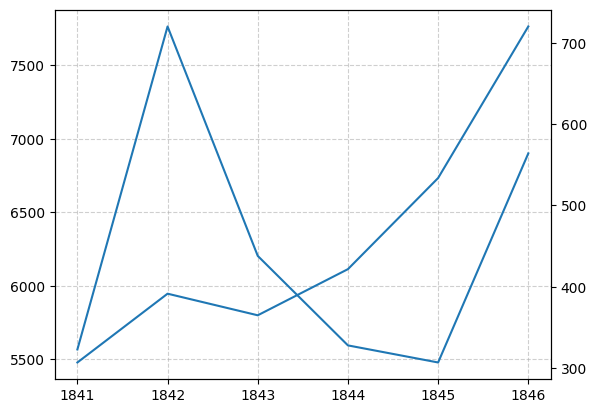

In [ ]:
plt.plot(plot_data.year, plot_data.births)
plt.grid(True, linestyle='--', alpha=0.6)
ax2 = plt.twinx()
ax2.plot(plot_data.year, plot_data.deaths)


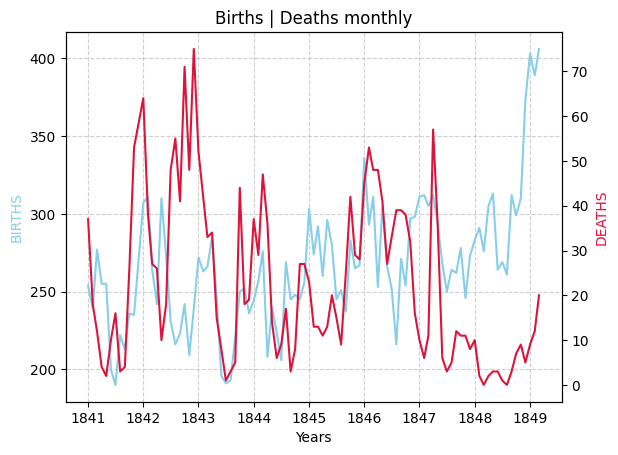

In [ ]:
plt.plot(df_monthly.date, df_monthly.births, color = 'skyblue')

plt.xlabel('Years')
plt.ylabel('BIRTHS',color='skyblue')
plt.grid(True, linestyle='--', alpha=0.6)
ax2 = plt.twinx()
ax2.plot(df_monthly.date, df_monthly.deaths ,color = 'crimson')
ax2.set_ylabel('DEATHS',color='crimson')
plt.title('Births | Deaths monthly')

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

Text(0, 0.5, 'DEATHS')

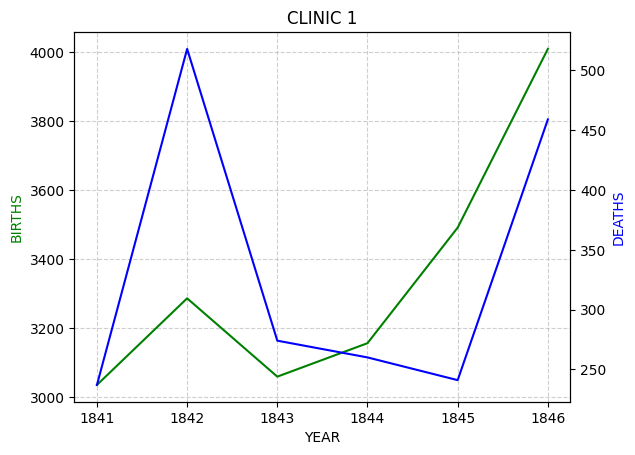

In [ ]:
clin_1 = df_yearly[df_yearly.clinic == 'clinic 1']

plt.plot(clin_1.year,clin_1.births, color='green')
plt.xlabel('YEAR')
plt.ylabel('BIRTHS', color='green')
plt.title('CLINIC 1')
plt.grid(True, linestyle='--', alpha=0.6)
ax2= plt.twinx()
ax2.plot(clin_1.year,clin_1.deaths,color='blue')
ax2.set_ylabel('DEATHS',color='blue')

Text(0, 0.5, 'DEATHS')

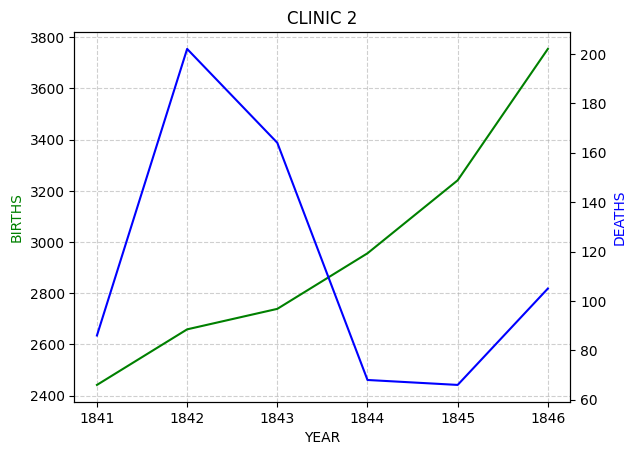

In [ ]:
clin_2 = df_yearly[df_yearly.clinic == 'clinic 2']
plt.plot(clin_2.year,clin_2.births, color='green')
plt.xlabel('YEAR')
plt.ylabel('BIRTHS', color='green')
plt.title('CLINIC 2')
plt.grid(True, linestyle='--', alpha=0.6)
ax2= plt.twinx()
ax2.plot(clin_2.year,clin_2.deaths,color='blue')
ax2.set_ylabel('DEATHS',color='blue')

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')

line.show()

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')

line.show()


### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
df_yearly['pct_deaths'] = ((df_yearly.deaths/df_yearly.births )*100)
df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


In [ ]:
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic',
               title='Deaths % by Clinic')

line.show()

In [ ]:
average_1 = (df_yearly.deaths[df_yearly.clinic == 'clinic 1'].sum() /  df_yearly.births[df_yearly.clinic == 'clinic 1'].sum())
average_1*100

9.924159265542361

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')


* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [ ]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [ ]:
before = df_monthly.loc[df_monthly.date < handwashing_start]
after = df_monthly.loc[df_monthly.date >= handwashing_start]

In [ ]:
before_pct = before.pct_deaths.mean()
after_pct = after.pct_deaths.mean()

In [ ]:
percentuale_formattata_before = "{:.1f}%".format(before_pct * 100)
percentuale_formattata_after = "{:.1f}%".format(after_pct * 100)
print(f'Ther average Deaths before handwash was : {percentuale_formattata_before} \n The average after was : {percentuale_formattata_after}')

Ther average Deaths before handwash was : 10.5% 
 The average after was : 2.1%


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

Need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [ ]:
df_monthly
df_monthly1 = df_monthly.set_index('date')

In [ ]:
rolling_avg = df_monthly1.pct_deaths.rolling(window=6).mean()
r_a= rolling_avg.to_frame()

In [ ]:
average_6 = r_a.reset_index().fillna(0)
average_6

,date,pct_deaths
0,1841-01-01,0.00
1,1841-02-01,0.00
2,1841-03-01,0.00
3,1841-04-01,0.00
4,1841-05-01,0.00
...,...,...
93,1848-11-01,0.01
94,1848-12-01,0.01
95,1849-01-01,0.02
96,1849-02-01,0.02


### Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
*[code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

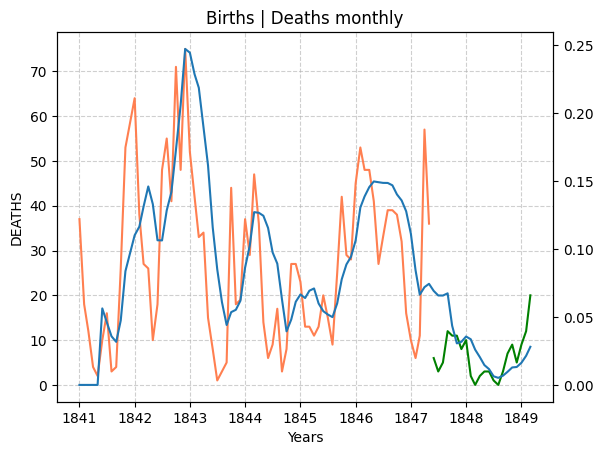

In [ ]:
plt.plot(before.date, before.deaths, color = 'coral')

plt.xlabel('Years')
plt.ylabel('DEATHS',color='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.plot(after.date, after.deaths, color = 'green')
plt.title('Births | Deaths monthly')
ax2 = plt.twinx()
ax2.plot(average_6.date,average_6.pct_deaths)
plt.show()

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [ ]:
import numpy as np
from datetime import datetime

df_monthly['b_or_a'] = np.where(df_monthly['date'] < datetime(1847,1,1), 'no', 'yes')


In [ ]:
px.box(df_monthly,df_monthly.b_or_a,df_monthly.pct_deaths,color= 'b_or_a')


### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [ ]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                   color='b_or_a',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

The upper part of the boxplot shows the distribution of data for each group. The boxplot is composed of :



*   The central line represents the median, which is the value that divides the data set in half.
*   The quartile lines represent the quartiles, which are the values that divide the data set into four equal parts.
*   The lower and upper whiskers represent the lowest and highest values in the data set, excluding outliers.






**Interpretation of data:**

Based on the data in the boxplot, we can see that people who wash their hands have a lower monthly death rate than people who do not wash their hands.

The median for people who wash their hands is 20%, while the median for people who do not wash their hands is 30%. This means that, on average, 20% of people who wash their hands die each month, while 30% of people who do not wash their hands die each month.

In addition, the standard deviation for people who wash their hands is lower than the standard deviation for people who do not wash their hands. This means that the data for people who wash their hands is more concentrated around the median, while the data for people who do not wash their hands is more spread out.

**Conclusion:**

In conclusion, the boxplot shows that people who wash their hands have a lower risk of dying than people who do not wash their hands. This is likely due to the fact that washing your hands helps prevent the spread of disease.

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


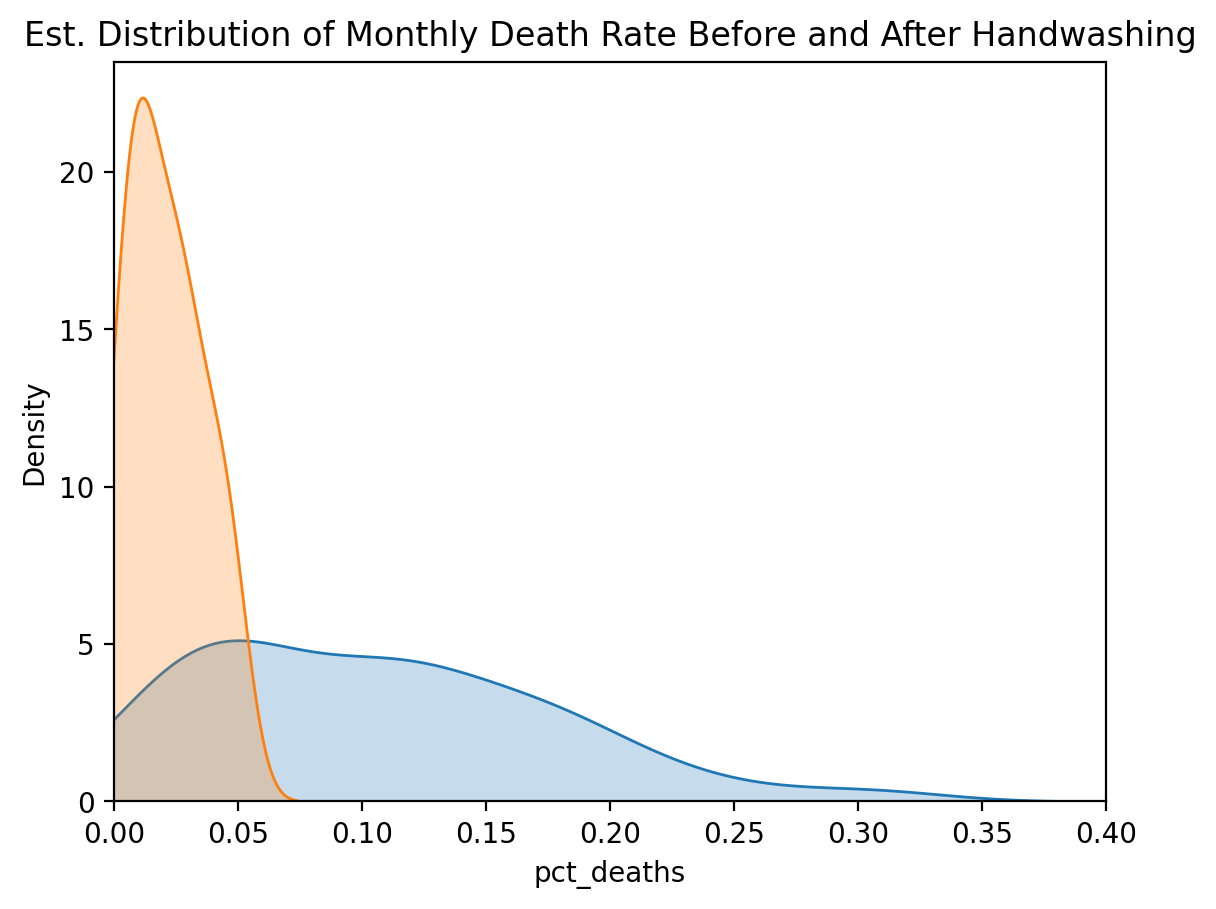

In [ ]:
plt.figure(dpi=200)
sns.kdeplot(before.pct_deaths, fill = True)
sns.kdeplot(after.pct_deaths, fill = True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [ ]:
import scipy.stats as stats

In [ ]:
t_stat, p_value = stats.ttest_ind(a=before.pct_deaths,
                                  b=after.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512
